# Image Cropping

In this notebook, we will crop an image using OpenCV. We will use the `cv2.imread()` function to read the image and the `cv2.imshow()` function to display the image. We will then crop the image using the `numpy` slicing method and display the cropped image using the `matplotlib` library.

# Library Installation

In [ ]:
# Uncomment the following lines to install the required libraries if using Colab or if not installed yet

# !pip install opencv-python
# !pip install matplotlib
# !pip install numpy
# !pip install scikit-learn

In [64]:
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
PLAYERS_DIR = '../outputs/players/'

In [46]:
def show_img(path):
    plt.imshow(path)
    # plt.axis('off')
    plt.show()
    
def read_player_img(img_path, show_top_half=False):
    """
    Read the image of the player

    :param img_path: Path to the image
    :param show_top_half: If True, only show the top half of the image
    :return: Image
    """

    img = cv2.imread(img_path)
    if show_top_half:
        img = img[:img.shape[0]//2, :]
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return img

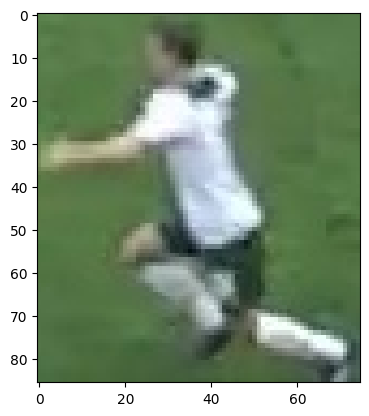

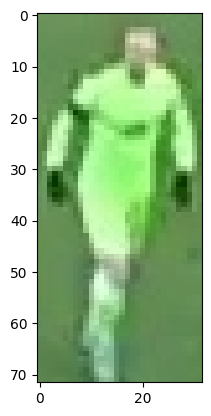

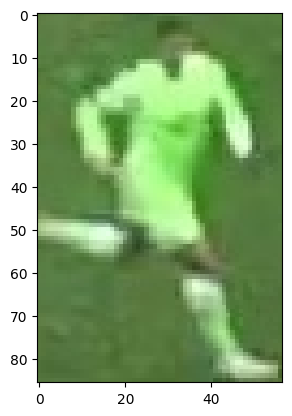

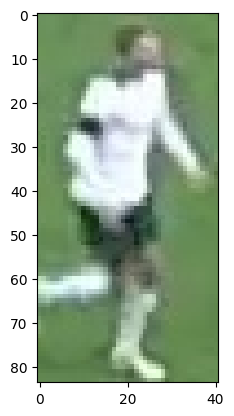

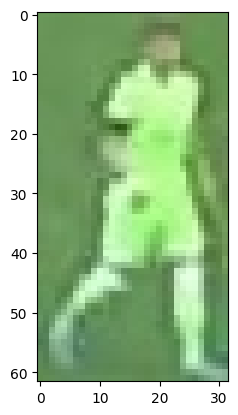

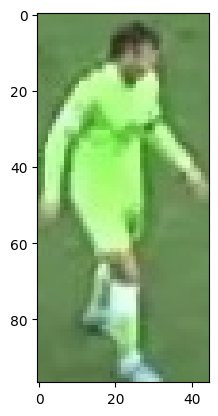

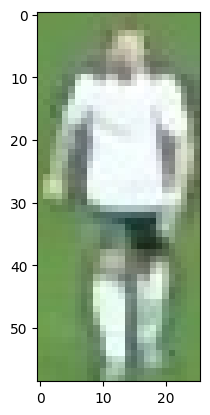

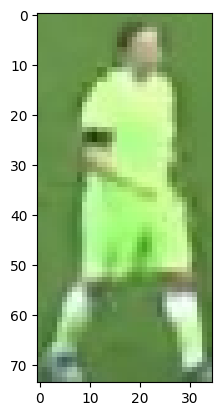

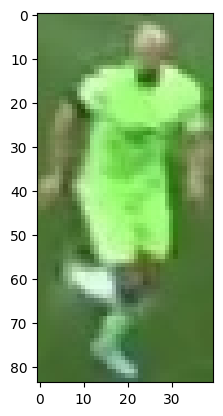

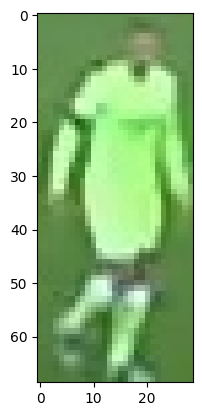

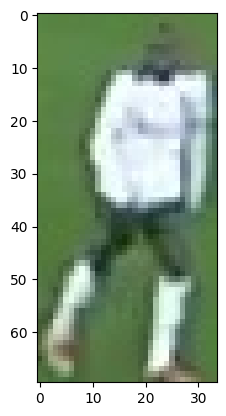

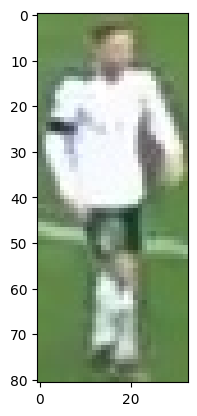

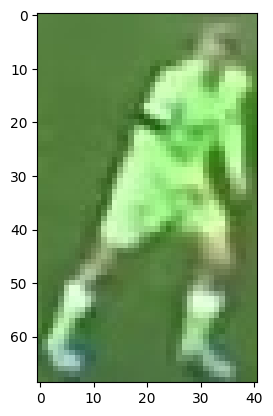

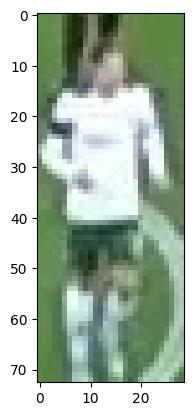

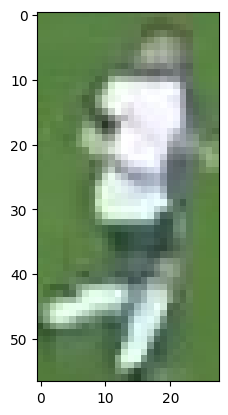

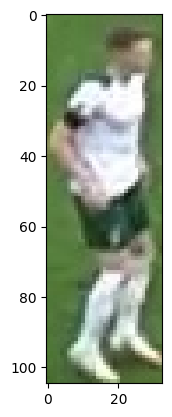

In [47]:
for i in range(1, len(os.listdir(PLAYERS_DIR))):
    path = f'{PLAYERS_DIR}/player_{i}.jpg'
    
    if os.path.exists(path):
        img = read_player_img(path)
        show_img(img)

# Take only the top half of the Image

The top half of the image will determine the team color of the player.

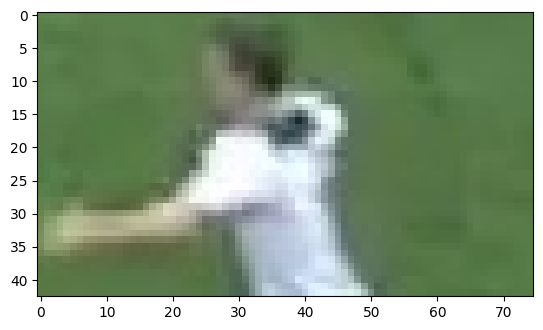

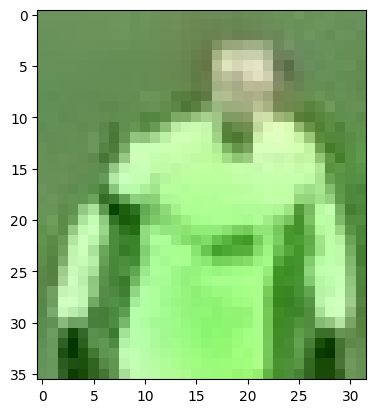

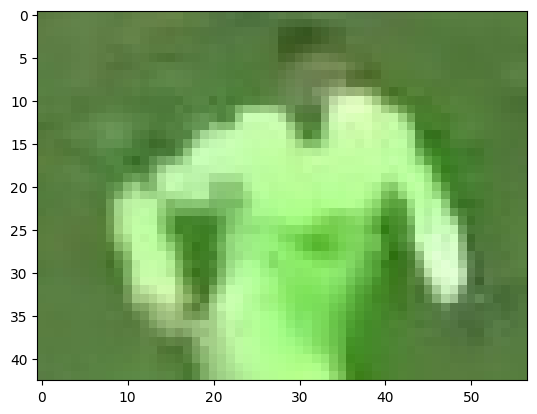

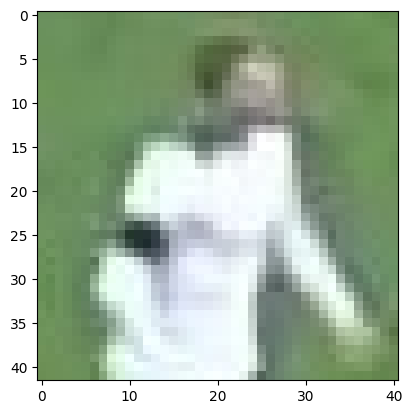

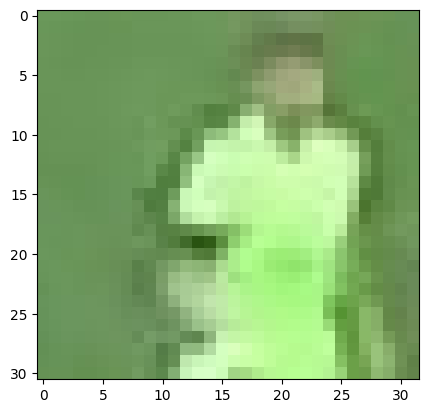

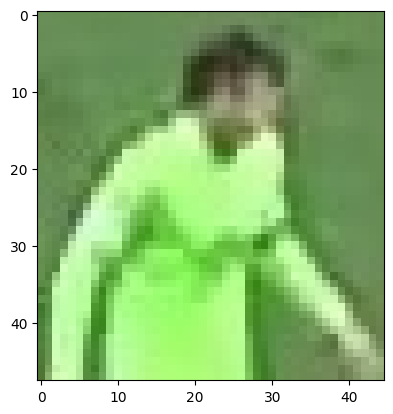

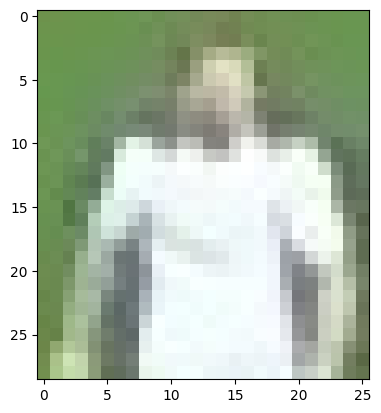

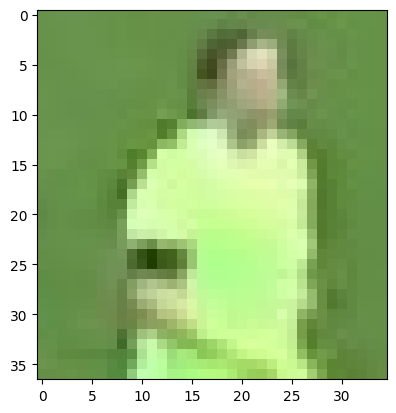

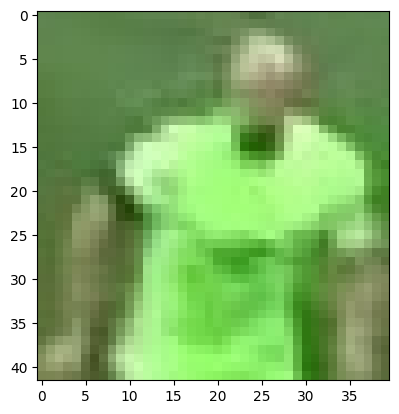

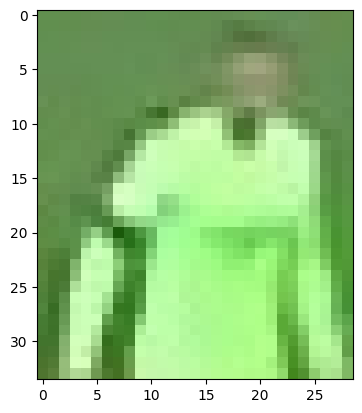

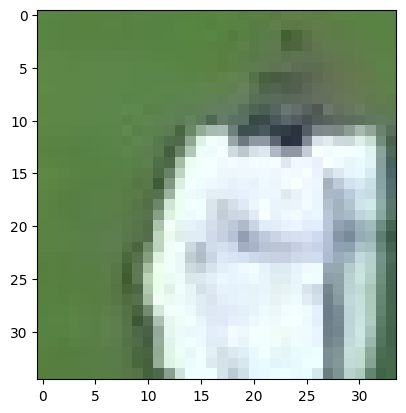

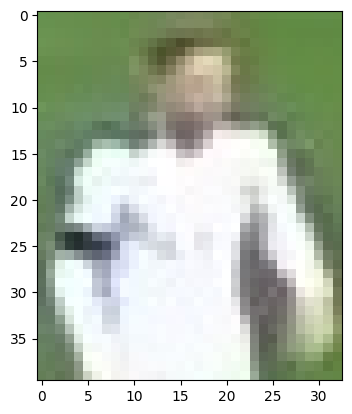

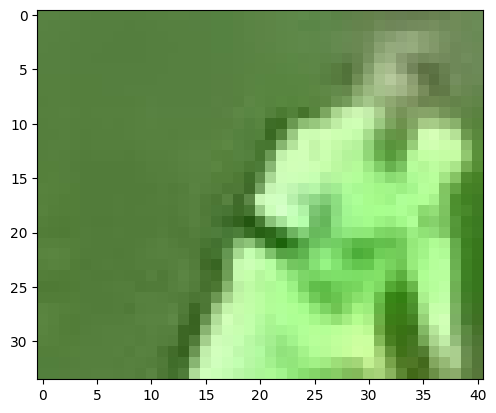

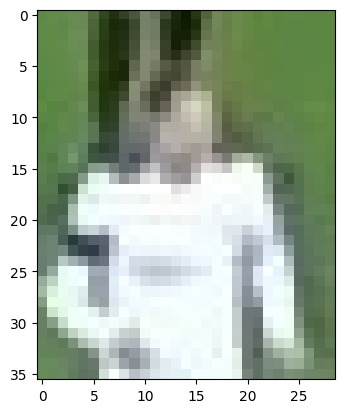

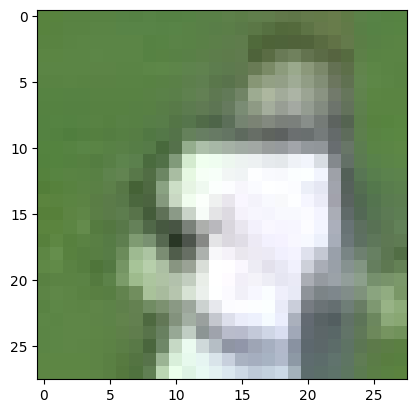

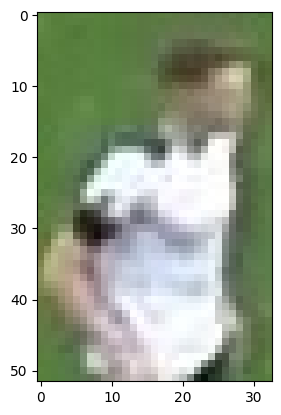

In [49]:
for i in range(1, len(os.listdir(PLAYERS_DIR))):
    path = f'{PLAYERS_DIR}/player_{i}.jpg'
    
    if os.path.exists(path):
        img = read_player_img(path, show_top_half=True)
        show_img(img)

# Cluster Image into two

In [55]:
# Perform KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)

def cluster_img(img):
    """
    Cluster the image into two clusters using KMeans clustering
    
    :param img: Image to cluster 
    :return: Clustered image
    """
    
    # Reshape the image to 2D
    img_2d = img.reshape(-1, 3)
    
    kmeans.fit(img_2d)
    
    labels = kmeans.labels_
    
    # Reshape the labels to the original image shape
    clustered_img = labels.reshape(img.shape[0], img.shape[1])
    
    return clustered_img

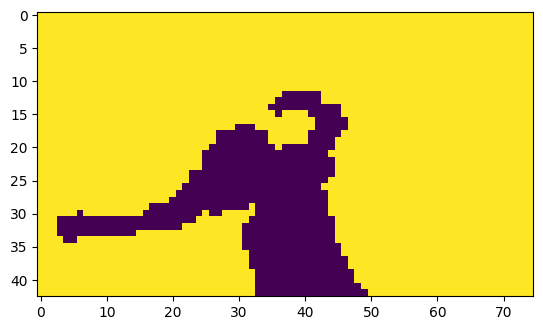

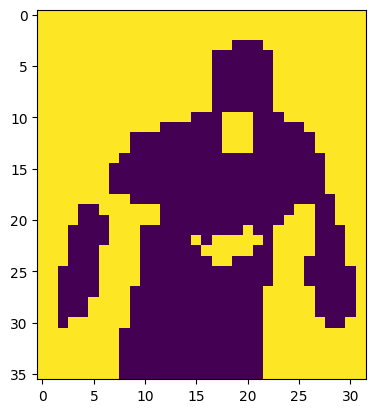

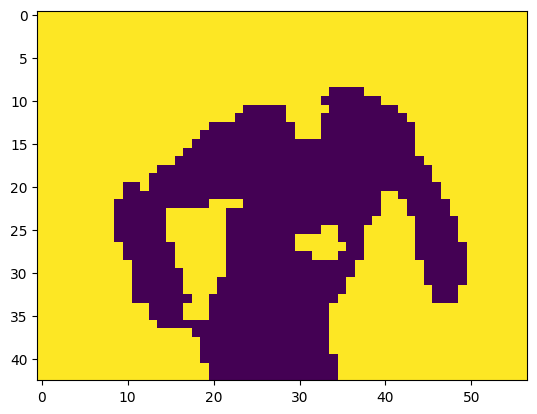

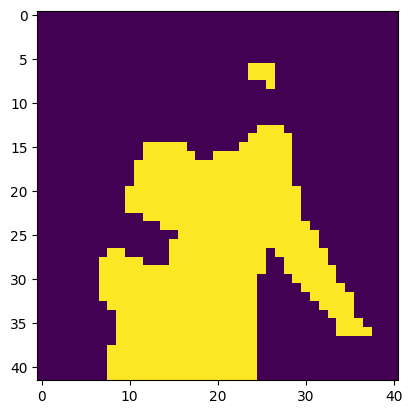

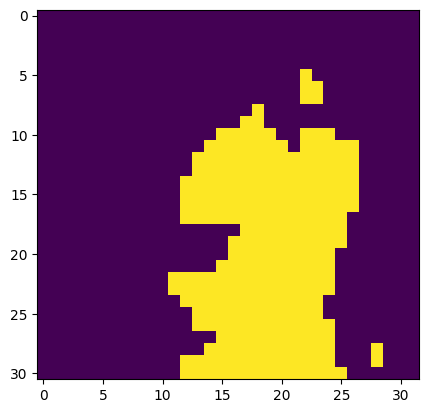

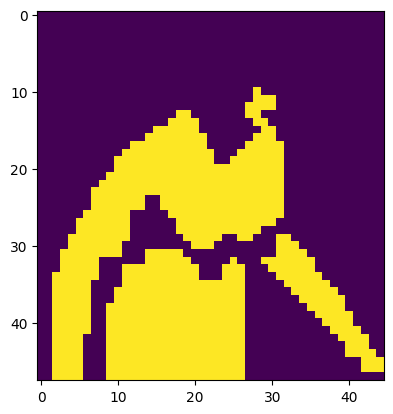

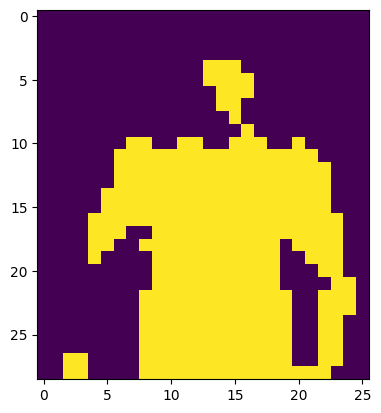

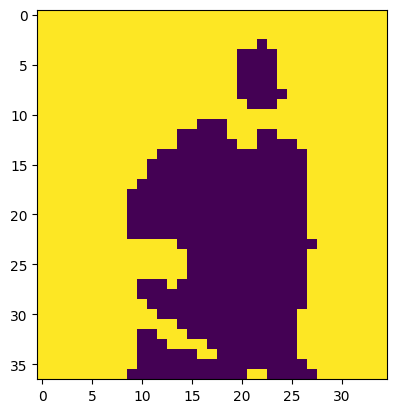

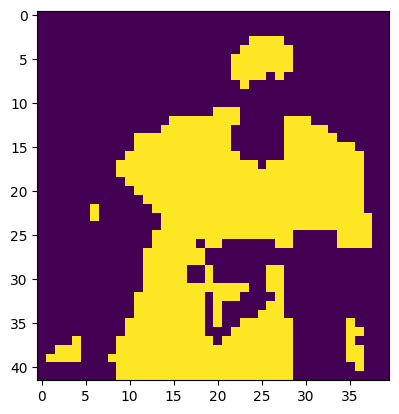

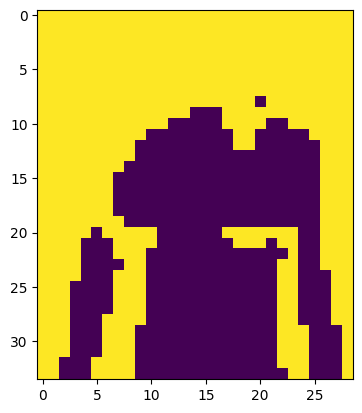

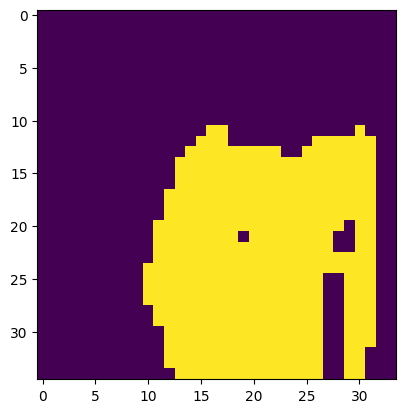

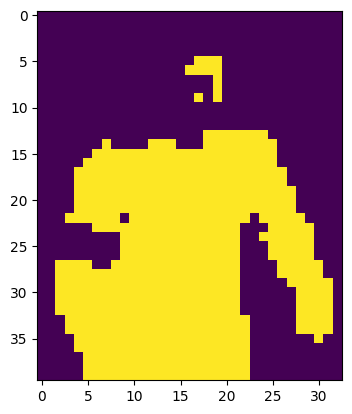

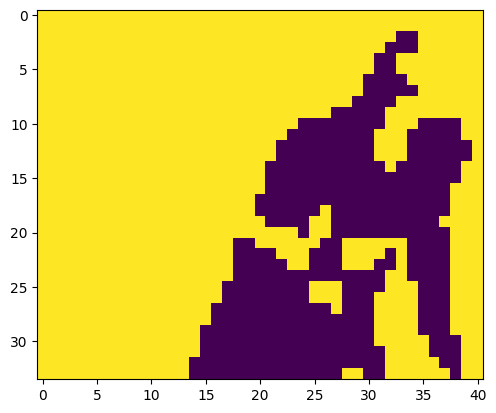

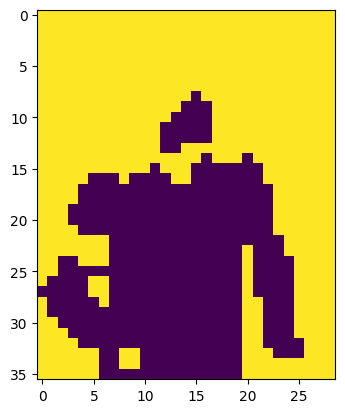

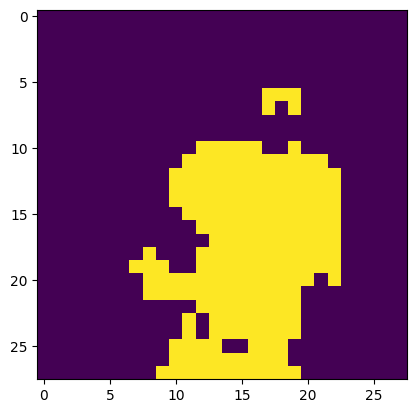

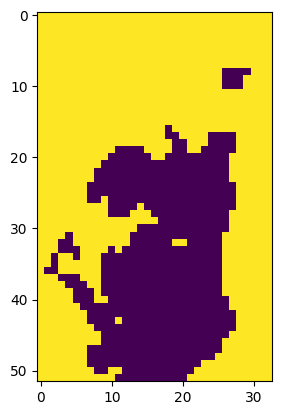

In [56]:
for i in range(1, len(os.listdir(PLAYERS_DIR))):
    path = f'{PLAYERS_DIR}/player_{i}.jpg'
    
    if os.path.exists(path):
        img = read_player_img(path, show_top_half=True)
        clustered_img = cluster_img(img)
        show_img(clustered_img)

# Determine the Player Cluster

The player cluster is determined by the majority cluster of the four corners of the image.

In [63]:
for i in range(1, len(os.listdir(PLAYERS_DIR))):
    path = f'{PLAYERS_DIR}/player_{i}.jpg'
    
    if os.path.exists(path):
        img = read_player_img(path, show_top_half=True)
        clustered_img = cluster_img(img)
        
        corner_clusters = [clustered_img[0, 0], clustered_img[0, -1], clustered_img[-1, 0], clustered_img[-1, -1]]  # Top left, Top right, Bottom left, Bottom right
        non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)  # Cluster with the highest count
        player_cluster = 1 - non_player_cluster  # Player cluster is the opposite of the non-player cluster

        color = kmeans.cluster_centers_[player_cluster]
        
        print(f'Player Cluster {i} Color: {color}')

Player Cluster 1 Color: [198.82527881 208.81226766 211.33457249]
Player Cluster 2 Color: [172.88935282 238.16492693 147.92275574]
Player Cluster 3 Color: [171.04353562 235.51319261 142.58443272]
Player Cluster 4 Color: [223.56346154 234.75       234.75576923]
Player Cluster 5 Color: [184.86466165 239.81578947 153.92481203]
Player Cluster 6 Color: [175.97852349 242.4738255  140.64966443]
Player Cluster 8 Color: [230.54754098 238.45901639 234.92131148]
Player Cluster 9 Color: [198.46851385 240.32493703 152.91939547]
Player Cluster 10 Color: [158.66609589 230.41952055 126.46061644]
Player Cluster 11 Color: [177.21014493 244.66666667 151.94444444]
Player Cluster 12 Color: [217.79254079 232.47319347 236.17016317]
Player Cluster 13 Color: [235.47130435 239.11826087 238.80347826]
Player Cluster 14 Color: [169.23341523 233.10565111 143.72235872]
Player Cluster 15 Color: [225.38059701 234.36318408 234.10447761]
Player Cluster 17 Color: [217.26530612 222.89795918 223.87244898]
Player Cluster 18 